In [1]:
import getpass

In [2]:
getpass.getuser()

'mbilkis'

In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt 

dire = "/data/uab-giq/scratch/matias/quantera/trajectories/"

[f for f in os.listdir(dire)]

['50periods',
 '80periods',
 '10periods',
 '15periods',
 '20periods',
 '60periods',
 '30periods',
 '100periods',
 '5periods',
 '40periods',
 '25periods']

In [47]:
distances = {}

periods = [5, 10, 15,25, 30, 40, 60, 50, 80]
its = 50

for p in tqdm(periods):

    dire = "/data/uab-giq/scratch/matias/quantera/trajectories/{}periods/".format(p)

    As = []
    for i in range(1,its+1):
        try:
            As.append(np.load(dire+"{}/A_history.npy".format(i))[-1])
        except Exception:
            pass

    Avar_mean,Avar_true=[], []
    Atrue = np.array([[0,1],[-1,0]])
    Amean = np.mean(As,axis=0)
    for a in As:
        Avar_mean.append(np.square(a-Amean))
        Avar_true.append(np.square(a-Atrue))

    var_mean = np.sqrt(np.sum(Avar_mean,axis=0)/(len(As)-1))
    var_true = np.sqrt(np.sum(Avar_true,axis=0))/(len(As)-1)

    distances[p] = [var_mean, var_true]

In [50]:
%timeit [k for k in range(10**5)]

7.08 ms ± 473 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Text(0, 0.5, 'Some measure of error between $A_\\theta$ and $A_{true}$')

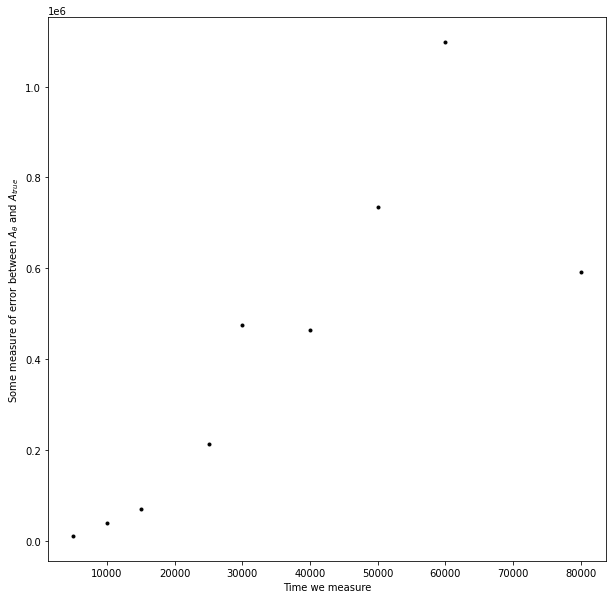

In [48]:
plt.figure(figsize=(10,10))
times = np.array(periods)*1000
#plt.scatter(range(len(periods)), [np.round(np.mean(distances[p][1]),10) for p in periods],s=200)
plt.plot(times, 1/np.array([np.round(np.mean(distances[p][1]),10) for p in periods])**2,'.',linewidth=3, color="black")
#plt.plot(times,times)
#plt.plot(times,times**2)
plt.xlabel("Time we measure")
plt.ylabel("Some measure of error between "+r'$A_\theta$' + " and " + r'$A_{true}$')

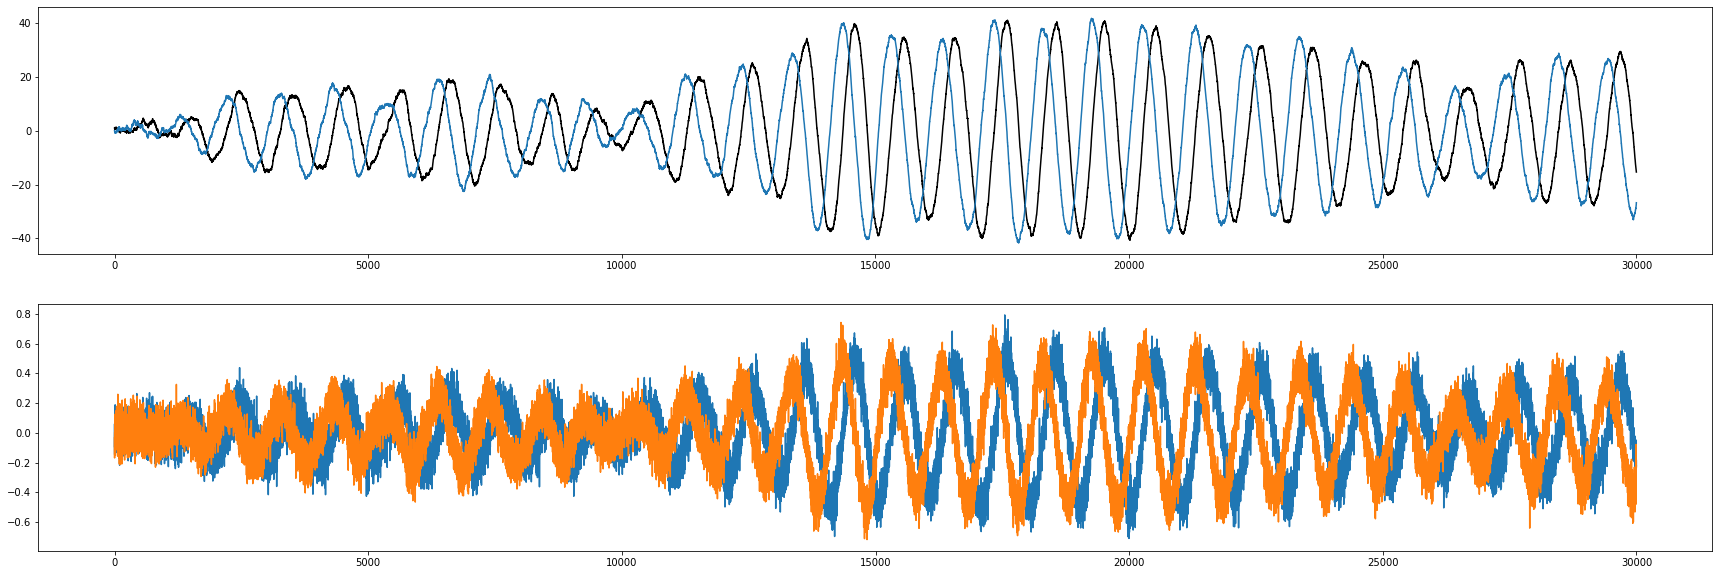

In [27]:
p = 30
dire1 = "/data/uab-giq/scratch/matias/quantera/trajectories/{}periods/1/".format(p)
means = np.load(dire1+"means.npy")
signals = np.load(dire1+"signals.npy")

plt.figure(figsize=(30,10))
plt.subplot(211)
plt.plot(means[:,0], color="black")
plt.plot(means[:,1])
plt.subplot(212)
plt.plot(signals[:,0])
plt.plot(signals[:,1])

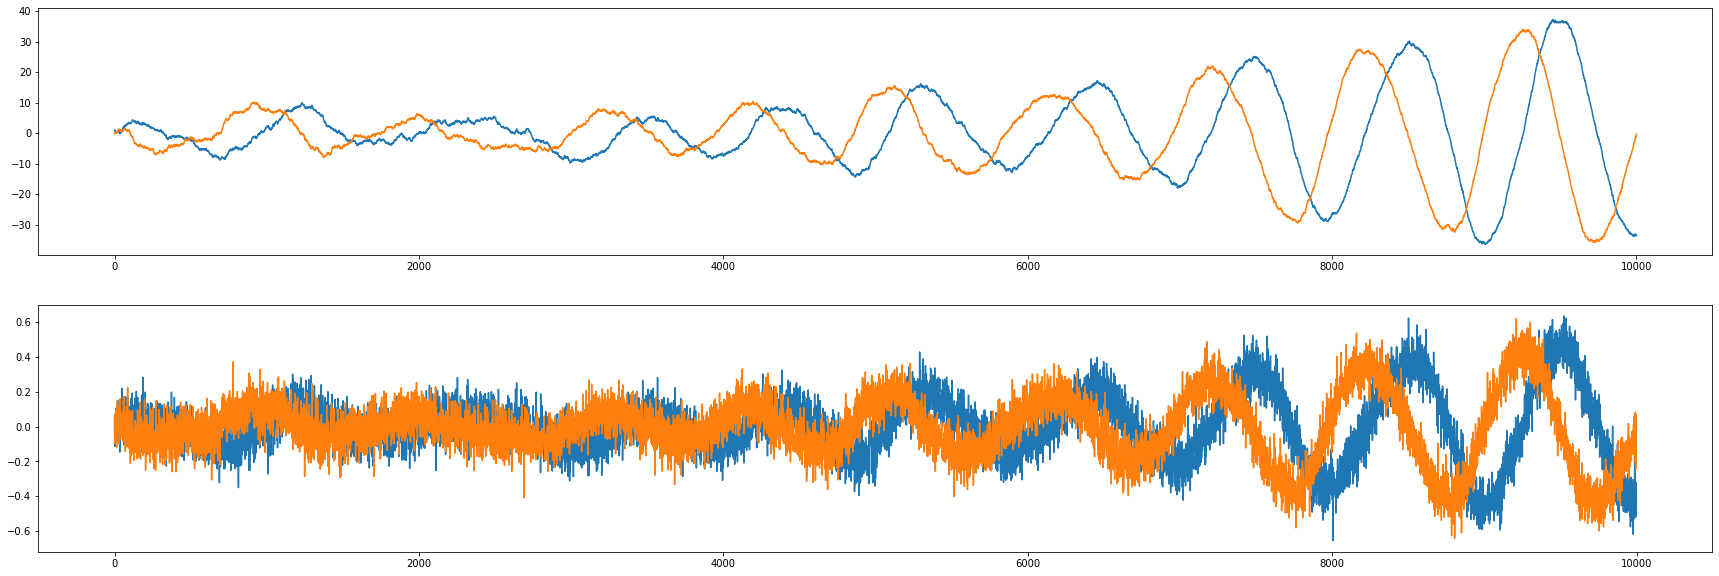

In [18]:
p = 10
dire1 = "/data/uab-giq/scratch/matias/quantera/trajectories/{}periods/1/".format(p)
means = np.load(dire1+"means.npy")
signals = np.load(dire1+"signals.npy")

plt.figure(figsize=(30,10))
plt.subplot(211)
plt.plot(means[:,0])
plt.plot(means[:,1])
plt.subplot(212)
plt.plot(signals[:,0])
plt.plot(signals[:,1])

In [20]:
As[-1]

array([[-0.00131059,  0.99620414],
       [-0.9859313 , -0.00685639]], dtype=float32)